## Preprocessing

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt
import tqdm
from timeit import default_timer as timer

from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

C:\Users\fre_f\anaconda3\envs\FF\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
prefix = 'c:/users/fre_f/PythonProjects/Bacteriological/Data/'
df = pd.read_csv(prefix+'DESL_Species.csv')

In [3]:
df.head()

,Index,DESL,None;Other;Other;Other;Other;Other;Other,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter;s__smithii,k__Bacteria;p__Acidobacteria;c__Acidobacteria;o__NA;f__NA;g__Blastocatella;s__sp3006,k__Bacteria;p__Acidobacteria;c__Holophagae;o__NA;f__NA;g__NA;s__sp3737,k__Bacteria;p__Acidobacteria;c__Holophagae;o__NA;f__NA;g__NA;s__sp4001,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Acidimicrobiaceae;g__NA;s__sp4262,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4310,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4312,...,Light treatment,OSDI score,DEQ5 score,TBUT OD,TBUT OS,OSS OD,OSS OS,ST OD,ST OS,Demodicosis
0,P1,3,0.000000,0.000000,0.0,0.0,0,0,0.0,0,...,0,NaN,NaN,3,3,0,0,23,23,0
1,P2,3,0.000000,0.000000,0.0,0.0,0,0,0.0,0,...,0,31.25,17.0,2,4,1,3,14,18,0
2,P3,2,0.023263,0.714645,0.0,0.0,0,0,0.0,0,...,1,33.30,16.0,8,8,3,3,11,8,0
3,P4,3,0.000000,0.000000,0.0,0.0,0,0,0.0,0,...,0,93.75,21.0,3,2,2,2,12,11,0
4,P5,1,0.016438,0.000000,0.0,0.0,0,0,0.0,0,...,1,6.25,7.0,11,11,0,0,22,32,0


In [4]:
df.iloc[:,2:]

,None;Other;Other;Other;Other;Other;Other,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter;s__smithii,k__Bacteria;p__Acidobacteria;c__Acidobacteria;o__NA;f__NA;g__Blastocatella;s__sp3006,k__Bacteria;p__Acidobacteria;c__Holophagae;o__NA;f__NA;g__NA;s__sp3737,k__Bacteria;p__Acidobacteria;c__Holophagae;o__NA;f__NA;g__NA;s__sp4001,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Acidimicrobiaceae;g__NA;s__sp4262,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4310,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4312,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4316,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__NA;g__NA;s__sp4642,...,Light treatment,OSDI score,DEQ5 score,TBUT OD,TBUT OS,OSS OD,OSS OS,ST OD,ST OS,Demodicosis
0,0.000000,0.000000,0.0,0.0,0,0,0.0,0,0,0.0,...,0,NaN,NaN,3,3,0,0,23,23,0
1,0.000000,0.000000,0.0,0.0,0,0,0.0,0,0,0.0,...,0,31.25,17.0,2,4,1,3,14,18,0
2,0.023263,0.714645,0.0,0.0,0,0,0.0,0,0,0.0,...,1,33.30,16.0,8,8,3,3,11,8,0
3,0.000000,0.000000,0.0,0.0,0,0,0.0,0,0,0.0,...,0,93.75,21.0,3,2,2,2,12,11,0
4,0.016438,0.000000,0.0,0.0,0,0,0.0,0,0,0.0,...,1,6.25,7.0,11,11,0,0,22,32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.015896,0.000000,0.0,0.0,0,0,0.0,0,0,0.0,...,0,40.90,10.0,2,1,1,1,12,17,0
57,0.000000,0.000000,0.0,0.0,0,0,0.0,0,0,0.0,...,0,18.75,8.0,6,6,0,0,35,35,1
58,0.000000,0.644642,0.0,0.0,0,0,0.0,0,0,0.0,...,0,75.00,16.0,6,5,2,1,17,14,0
59,0.000000,0.000000,0.0,0.0,0,0,0.0,0,0,0.0,...,0,20.45,9.0,7,4,0,1,35,27,1


In [5]:
df.iloc[:,1]

0     3
1     3
2     2
3     3
4     1
     ..
56    3
57    2
58    2
59    2
60    3
Name: DESL, Length: 61, dtype: int64

In [6]:
X = df.iloc[:,2:]
y = df.iloc[:,1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(48, 1355)
(13, 1355)
(48,)
(13,)


In [9]:
def lgbmetrics():
    y_pred = clflgbm.predict(X_test)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    cf = confusion_matrix(y_test, y_pred)
    target_names = ['1', '2', '3', '4']
    print(f"Balanced accuracy: {bal_acc}")
    print(f"MCC: {mcc}")
    print(f"F1: {f1}")
    print(f"Confusion matrix: \n{cf}")
    #print(f"Classification report: \n{classification_report(y_test, y_pred, target_names=target_names)}")

## Train and predict

In [10]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
clflgbm = LGBMClassifier().fit(X_train, y_train)
clflgbm.predict(X_test)

lgbmetrics()

Balanced accuracy: 0.7666666666666666
MCC: 0.75
F1: 0.7666666666666667
Confusion matrix: 
[[1 1 0]
 [1 4 0]
 [0 0 6]]


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

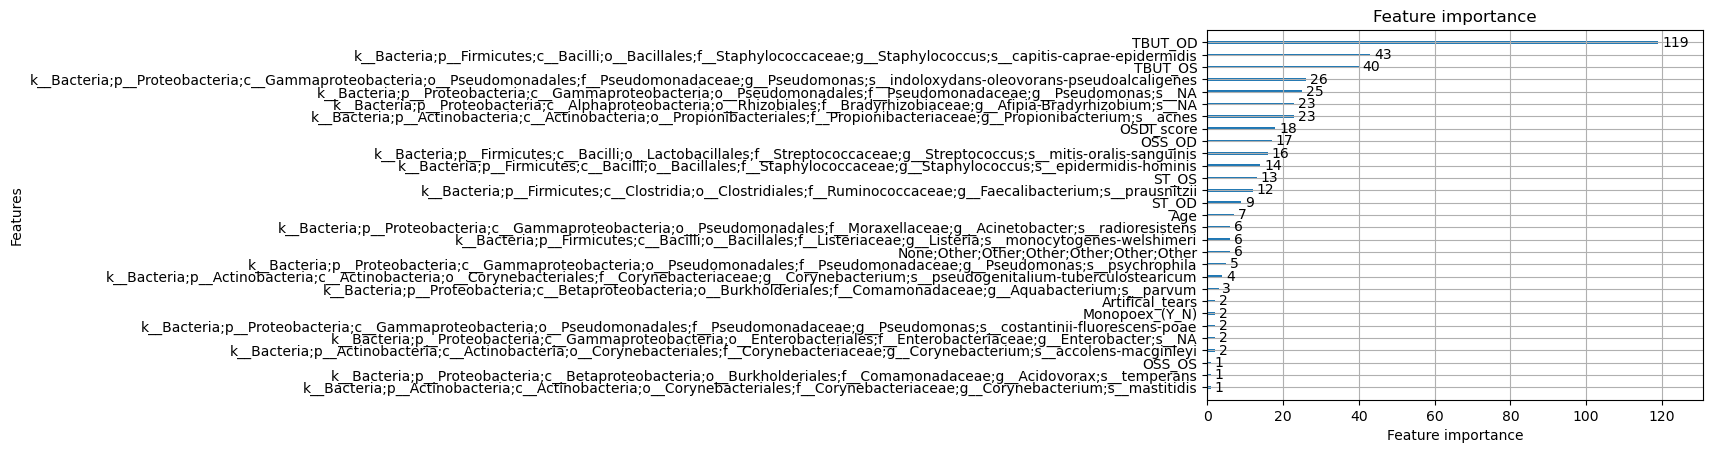

In [11]:
lgb.plot_importance(clflgbm)

In [12]:
# Create a SHAP explainer for the LightGBM model

explainerlgbm = shap.Explainer(clflgbm, X)

In [13]:
# Compute SHAP values for the dataset

#shap_valueslgbm = explainerlgbm(X)
shap_valueslgbm = explainerlgbm.shap_values(X.iloc[:,:])

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


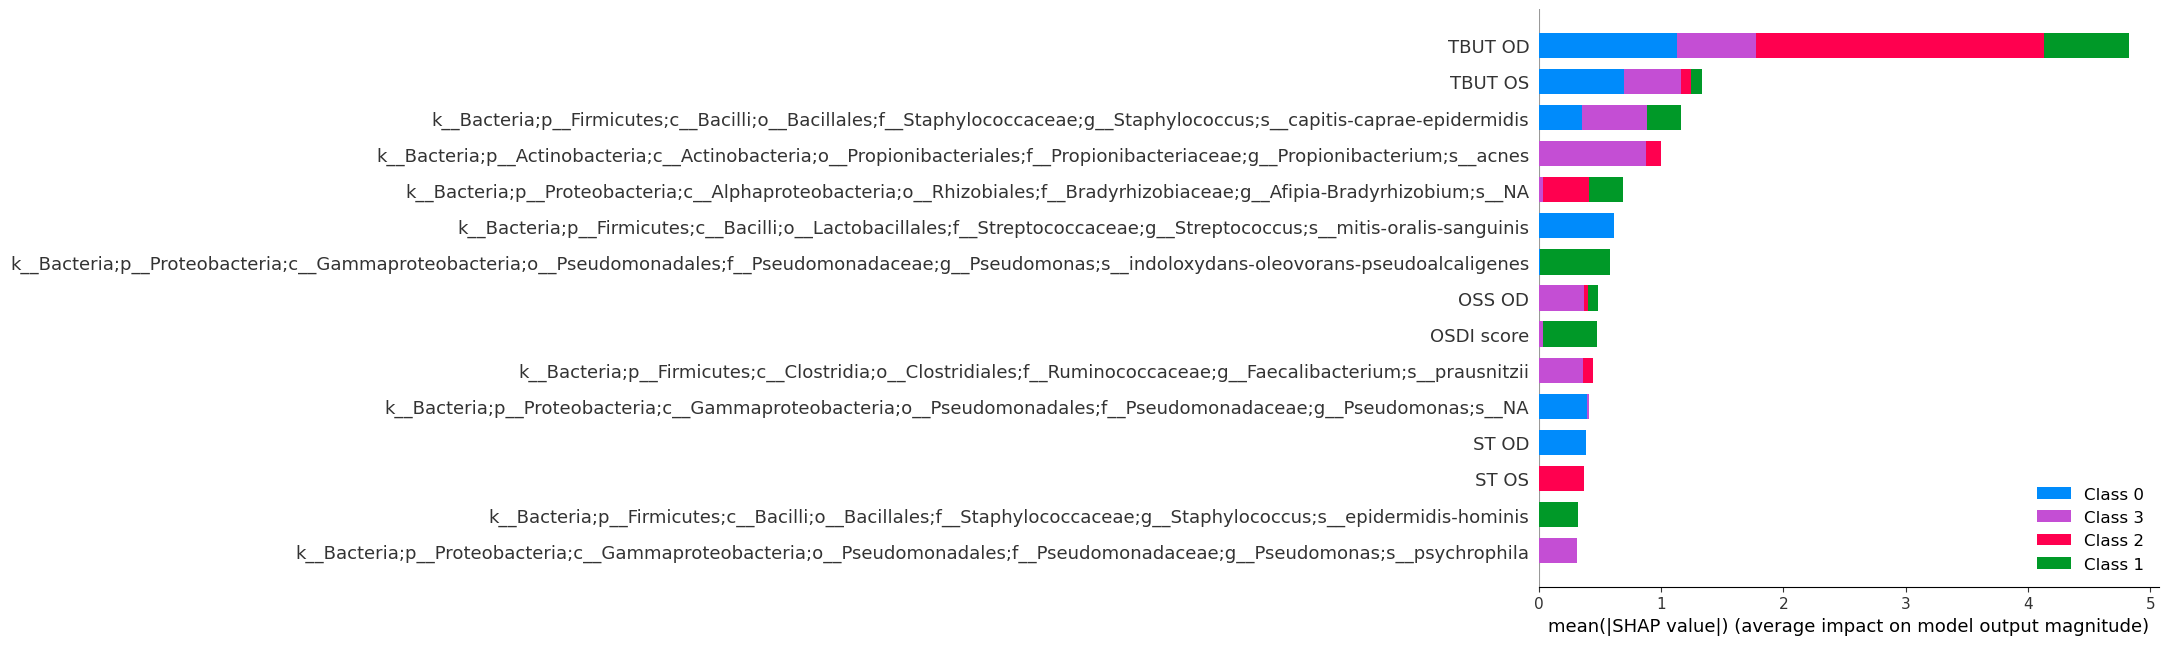

In [14]:
shap.summary_plot(shap_valueslgbm, X, plot_type='bar', max_display=15)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


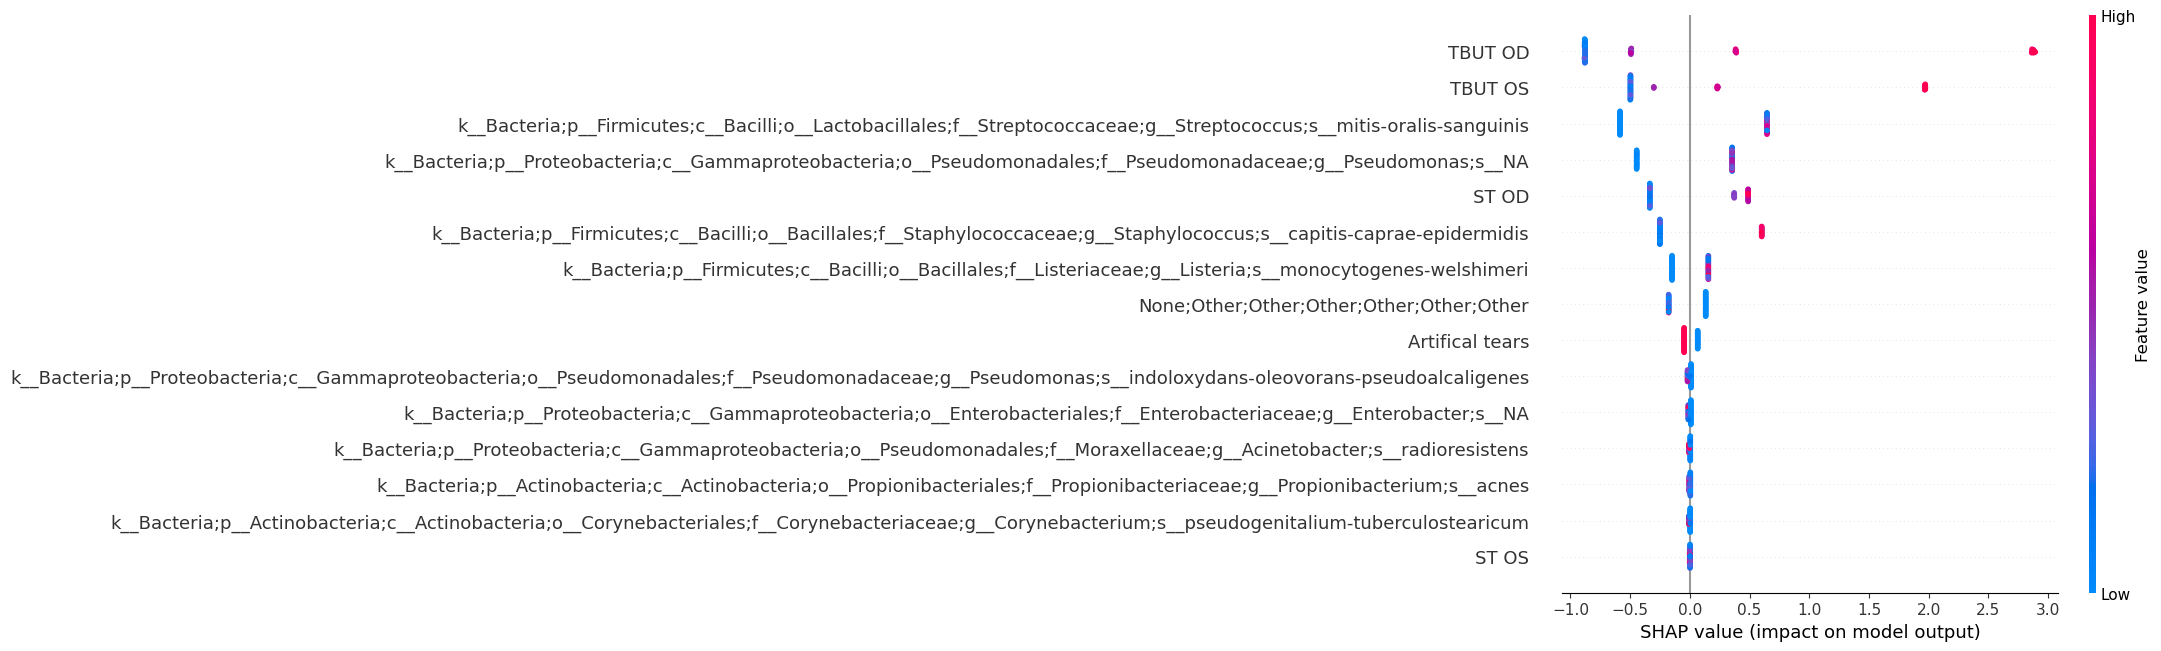

In [15]:
shap.summary_plot(shap_valueslgbm[0], X, max_display=15)